## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data=pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
complete_data.head()
                


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
complete_data['Mouse ID'].value_counts()

g989    13
m550    10
o562    10
q511    10
t565    10
        ..
d133     1
x226     1
v199     1
u153     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#From: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

duplicate_rows = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows based on Mouse ID and Timepoint columns are:", duplicate_rows, sep='\n')

Duplicate Rows based on Mouse ID and Timepoint columns are:
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26  


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#SEE ABOVE


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop=complete_data[complete_data['Mouse ID'] == 'g989'].index
clean_complete_data=complete_data.drop(mouse_to_drop)


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_complete_data['Mouse ID'].value_counts()

t451    10
m550    10
m269    10
q511    10
t565    10
        ..
o848     1
x226     1
l872     1
x336     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
med_grouped_cc_df=clean_complete_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].mean() 
med_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].median()
var_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].var()
std_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].std()
sem_tumorvol=med_grouped_cc_df['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary dataframe.
summary_grouped_df=pd.DataFrame({'Mean Tumor Vol.': avg_tumorvol,
                                'Median Tumor Vol.': med_tumorvol,
                                'Tumor Vol. Variance': var_tumorvol,
                                'Tumor Vol. Std. Dev.': std_tumorvol,
                                'Tumor Vol. SEM': sem_tumorvol})
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_grouped_df

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:


# Using the aggregation method, produce the same summary statistics in a single line
#From https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function
df=clean_complete_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std','sem']})

# Assemble the resulting series into a single summary dataframe.
aggregate_summary=pd.DataFrame(df)
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Unique Mice/Regimen')

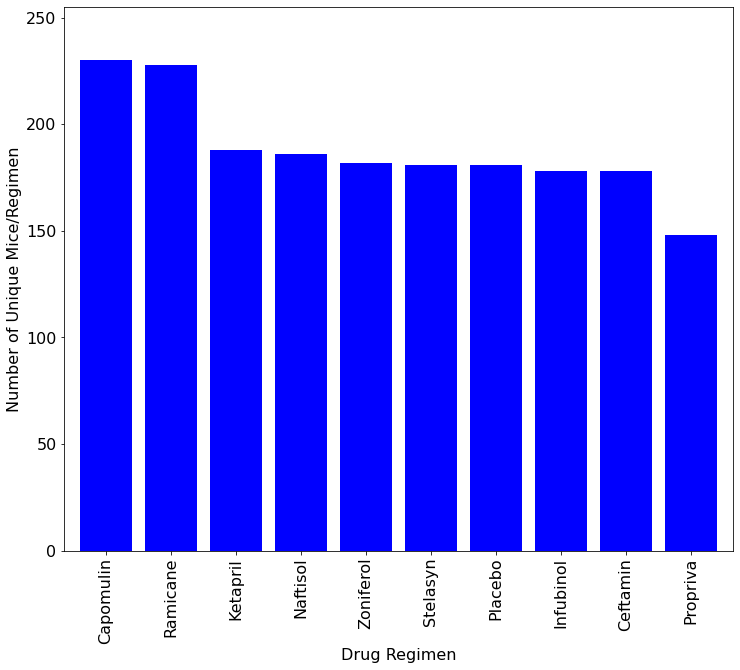

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
num_measure=clean_complete_data['Drug Regimen'].value_counts()
num_sorted=num_measure.sort_values( ascending=False)


num_sorted_df=pd.DataFrame(num_sorted)
num_sorted_df=num_sorted_df.rename(columns={"Drug Regimen":"Count"})

mr=num_sorted_df.plot(kind='bar', figsize=(12,10), legend=False, fontsize=16, color='b',ylim=(0, max(num_sorted)+25),width=.8)
mr.set_xlabel("Drug Regimen", fontsize=16)
mr.set_ylabel("Number of Unique Mice/Regimen", fontsize=16)


Text(0, 0.5, 'Number of Unique Mice/Regimen')

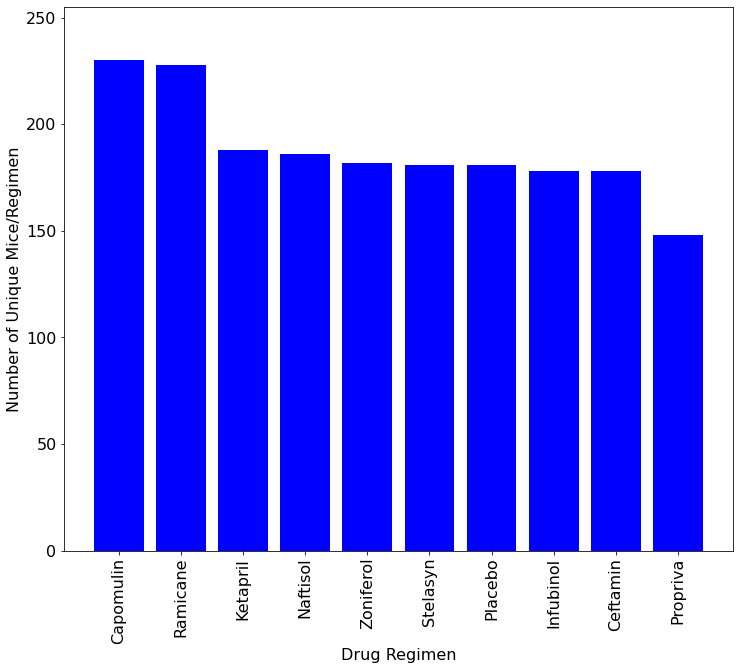

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
dnames=['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

x_axis=range(len(dnames))
tick_locations=[value for value in x_axis]
plt.figure(figsize= (12,10))
plt.rcParams['font.size']='16'
plt.bar(x_axis, num_sorted, color='b', alpha=1.0, align="center")
plt.xticks(tick_locations, dnames, rotation="vertical")

plt.ylim(0, max(num_sorted)+25)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice/Regimen')


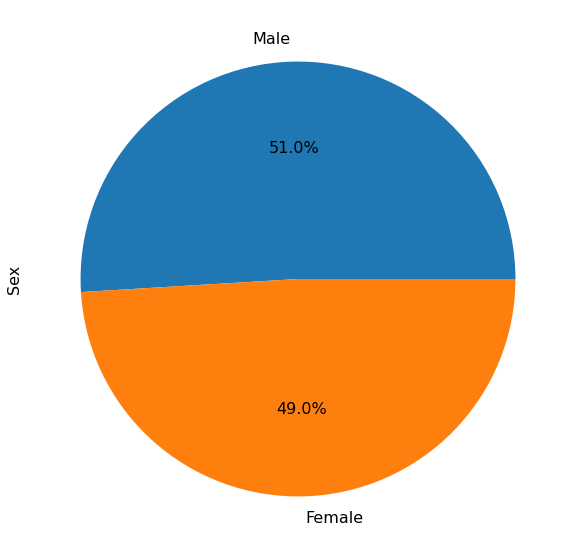

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_gender=clean_complete_data['Sex'].value_counts()

gender_df=pd.DataFrame(num_gender)

gr=gender_df.plot.pie(y='Sex', figsize=(10, 10), legend=False, autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x1f854e22828>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

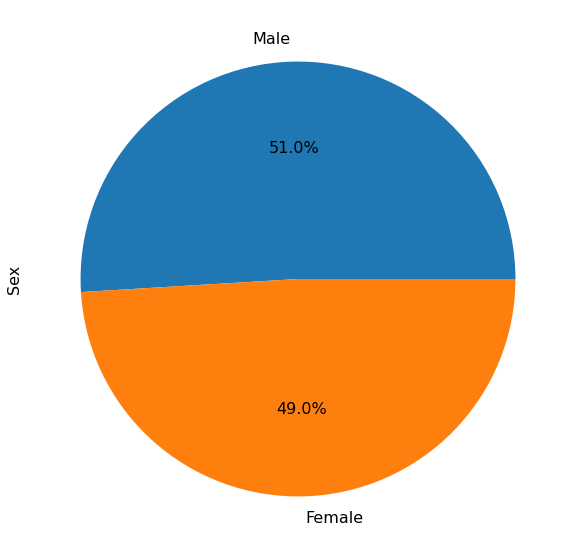

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
numbers=gender_df['Sex']
labels=['Male', 'Female']

plt.figure(figsize=(10,10))
plt.ylabel('Sex')
plt.pie(numbers, labels=labels, autopct="%1.1f%%" )

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp=clean_complete_data.groupby('Mouse ID', as_index=False)['Timepoint'].max()

#last_tp.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tp=last_tp.merge(clean_complete_data,on=['Mouse ID','Timepoint'],how='left')


In [14]:
#Put treatments into a list for for loop (and later for plot labels)¶

select_meds=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [15]:
#Create empty list to fill with tumor vol data (for plotting)¶

capo=[] 
rami=[] 
infu=[] 
ceft=[]

In [16]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.¶
# Locate the rows which contain mice on each drug and get the tumor volume

rami_mice=last_tp.loc[(last_tp['Drug Regimen']=='Ramicane')]
infu_mice=last_tp.loc[(last_tp['Drug Regimen']=='Infubinol')] 
ceft_mice=last_tp.loc[(last_tp['Drug Regimen']=='Ceftamin')]
capo_mice=last_tp.loc[(last_tp['Drug Regimen']=='Capomulin')]

capo=capo_mice['Tumor Volume (mm3)'] 
rami=rami_mice['Tumor Volume (mm3)'] 
infu=infu_mice['Tumor Volume (mm3)'] 
ceft=ceft_mice['Tumor Volume (mm3)'] 

#add subset 

#Determine outliers using upper and lower bounds

capo_quart=capo.quantile([0.25,.5,.75]) 
capo_lowerq=capo_quart[0.25] 
capo_upperq=capo_quart[.75] 
capo_iqr=capo_upperq - capo_lowerq 
capo_upper_bound=capo_upperq + (1.5*capo_iqr) 
capo_lower_bound=capo_lowerq - (1.5*capo_iqr) 
capo_sort=capo.sort_values() 


rami_quart=rami.quantile([0.25,.5,.75]) 
rami_lowerq=rami_quart[0.25] 
rami_upperq=rami_quart[.75] 
rami_iqr=rami_upperq - rami_lowerq 
rami_upper_bound=rami_upperq + (1.5*rami_iqr) 
rami_lower_bound=rami_lowerq - (1.5*rami_iqr) 
rami_sort=rami.sort_values() 


infu_quart=infu.quantile([0.25,.5,.75]) 
infu_lowerq=infu_quart[0.25] 
infu_upperq=infu_quart[.75] 
infu_iqr=infu_upperq - infu_lowerq 
infu_upper_bound=infu_upperq + (1.5*infu_iqr) 
infu_lower_bound=infu_lowerq - (1.5*infu_iqr) 
infu_sort=infu.sort_values() 
#print(f"Infubinol mice with Tumor Vol. below {infu_lower_bound} could be outliers.") 
#print(f"Infubinol mice with Tumor Vol above {infu_upper_bound} could be outliers.") 
#print(f"Infubinol Mice Tumor Vol. sorted in ascending order\n {infu_sort}")


ceft_quart=ceft.quantile([0.25,.5,.75]) 
ceft_lowerq=ceft_quart[0.25] 
ceft_upperq=ceft_quart[.75] 
ceft_iqr=ceft_upperq - ceft_lowerq 
ceft_upper_bound=ceft_upperq + (1.5*ceft_iqr) 
ceft_lower_bound=ceft_lowerq - (1.5*ceft_iqr) 
ceft_sort=ceft.sort_values() 

#Mouse ID = 31 in the Infubinol group is an outlier (low). There are no outliers in the other three groups.

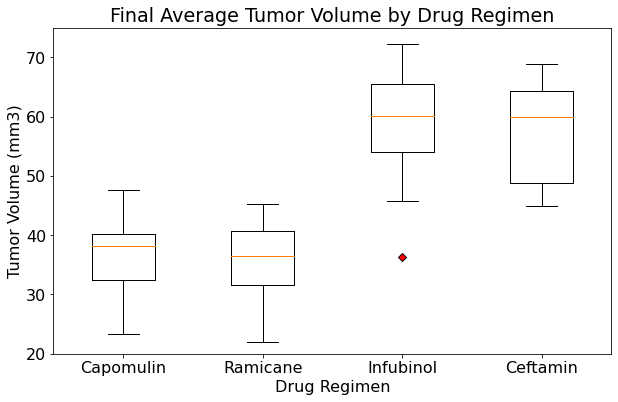

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#FROM http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

data_to_plot=[capo, rami, infu, ceft]
fig=plt.figure(1, figsize=(10,6))
red_diamond = dict(markerfacecolor='r', marker='D')
ax = fig.add_subplot(111)
plt.boxplot(data_to_plot,flierprops=red_diamond)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylim(20, 75, 10)
plt.title('Final Average Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()



## Line and Scatter Plots

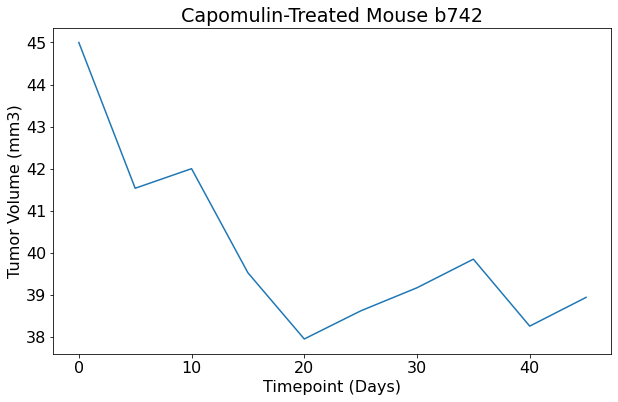

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_cap_mouse=clean_complete_data.loc[(clean_complete_data['Mouse ID']=='b742')]

x_axis_data=one_cap_mouse['Timepoint']
tumor_volume=one_cap_mouse['Tumor Volume (mm3)']
plt.figure(1, figsize=(10,6))
plt.title('Capomulin-Treated Mouse b742')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.plot(x_axis_data, tumor_volume)

plt.show()

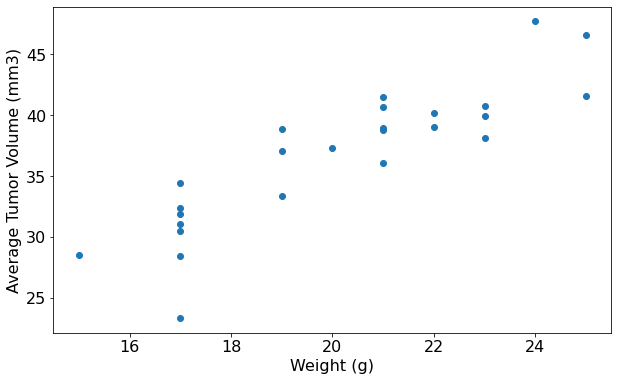

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Capomulin')]

id_grouped_capomulin_mice=capo_mice.groupby(['Mouse ID'])
avg_tv_capo_mice=id_grouped_capomulin_mice['Tumor Volume (mm3)'].mean()
avg_w_capo_mice=id_grouped_capomulin_mice['Weight (g)'].mean()

plt.figure(1, figsize=(10, 6))
plt.scatter(avg_w_capo_mice, avg_tv_capo_mice)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

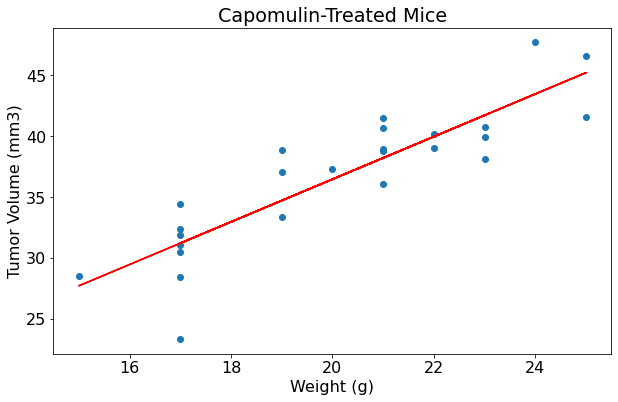

The Pearson correlation coefficient between Tumor Volume and Weight is 0.88
There are 25 Capomulin-Treated mice generating a total of 230 tumor volume/timepoint data points.
For that sample size, there is a statistically significant (p<0.05) positive correlation between mouse weight and average tumor Volume.


In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = avg_w_capo_mice
y_values = avg_tv_capo_mice
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Capomulin-Treated Mice')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

print(f"The Pearson correlation coefficient between Tumor Volume and Weight is {round(st.pearsonr(x_values, y_values)[0],2)}")

#From https://www.real-statistics.com/statistics-tables/pearsons-correlation-table/
print(f"There are 25 Capomulin-Treated mice generating a total of 230 tumor volume/timepoint data points.")
print(f"For that sample size, there is a statistically significant (p<0.05) positive correlation between mouse weight and average tumor Volume.")


In [21]:
#EXTRA ANALYSES

#Add Polacebo group

plac_mice=last_tp.loc[(last_tp['Drug Regimen']=='Placebo')]
plac=plac_mice['Tumor Volume (mm3)']


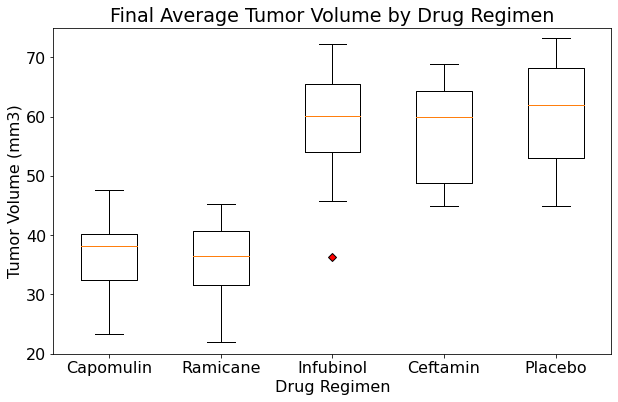

In [22]:
#Replot Final Tumor Vol
data_to_plot=[capo, rami, infu, ceft, plac]
fig=plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(data_to_plot, flierprops=red_diamond)
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin','Placebo'])
plt.ylim(20, 75, 10)
plt.title('Final Average Tumor Volume by Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

In [23]:
#Add Propriva group data as it was also better than Placebo

capomulin_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Capomulin')]
ramicane_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Ramicane')]
infubinol_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Infubinol')]
ceftamin_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Ceftamin')]
placebo_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Placebo')]
propriva_mice=clean_complete_data.loc[(clean_complete_data['Drug Regimen']=='Propriva')]


In [24]:
#Calculate Student's T-test for assorted paired samples measure = Average Tumor Volume (not Average Final Tumor Volume).

#FROM https://stackoverflow.com/questions/22611446/perform-2-sample-t-test

t, p = st.ttest_ind(capomulin_mice['Tumor Volume (mm3)'],infubinol_mice['Tumor Volume (mm3)'])
print("Capomulin v Infubinol ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(capomulin_mice['Tumor Volume (mm3)'],ceftamin_mice['Tumor Volume (mm3)'])
print("Capomulin v Ceftamin ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(capomulin_mice['Tumor Volume (mm3)'],placebo_mice['Tumor Volume (mm3)'])
print("Capomulin v Placebo ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(capomulin_mice['Tumor Volume (mm3)'],ramicane_mice['Tumor Volume (mm3)'])
print("Capomulin v Ramicane ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(placebo_mice['Tumor Volume (mm3)'],ceftamin_mice['Tumor Volume (mm3)'])
print("Placebo v Ceftamin ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(placebo_mice['Tumor Volume (mm3)'],infubinol_mice['Tumor Volume (mm3)'])
print("Placebo v Infubinol ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(placebo_mice['Tumor Volume (mm3)'],ramicane_mice['Tumor Volume (mm3)'])
print("Placebo v Ramicane ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(infubinol_mice['Tumor Volume (mm3)'],ramicane_mice['Tumor Volume (mm3)'])
print("Infubinol v Ramicane ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(ceftamin_mice['Tumor Volume (mm3)'],ramicane_mice['Tumor Volume (mm3)'])
print("Ceftamin v Ramicane ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(placebo_mice['Tumor Volume (mm3)'],propriva_mice['Tumor Volume (mm3)'])
print("Placebo v Propriva ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(propriva_mice['Tumor Volume (mm3)'],capomulin_mice['Tumor Volume (mm3)'])
print("Propriva v Capomulin ttest_ind:            t = %g  p = %g" % (t, p))

t, p = st.ttest_ind(propriva_mice['Tumor Volume (mm3)'],ramicane_mice['Tumor Volume (mm3)'])
print("Propriva v Ramicane ttest_ind:            t = %g  p = %g" % (t, p))

Capomulin v Infubinol ttest_ind:            t = -21.3305  p = 2.89282e-68
Capomulin v Ceftamin ttest_ind:            t = -21.3684  p = 1.97248e-68
Capomulin v Placebo ttest_ind:            t = -21.0242  p = 4.59391e-67
Capomulin v Ramicane ttest_ind:            t = 0.997968  p = 0.318824
Placebo v Ceftamin ttest_ind:            t = 1.92626  p = 0.0548652
Placebo v Infubinol ttest_ind:            t = 1.50593  p = 0.132969
Placebo v Ramicane ttest_ind:            t = 21.9029  p = 8.0456e-71
Infubinol v Ramicane ttest_ind:            t = 22.3576  p = 1.21013e-72
Ceftamin v Ramicane ttest_ind:            t = 22.4351  p = 5.56858e-73
Placebo v Propriva ttest_ind:            t = 2.11513  p = 0.0351752
Propriva v Capomulin ttest_ind:            t = 19.4328  p = 9.82087e-59
Propriva v Ramicane ttest_ind:            t = 20.4336  p = 7.35268e-63


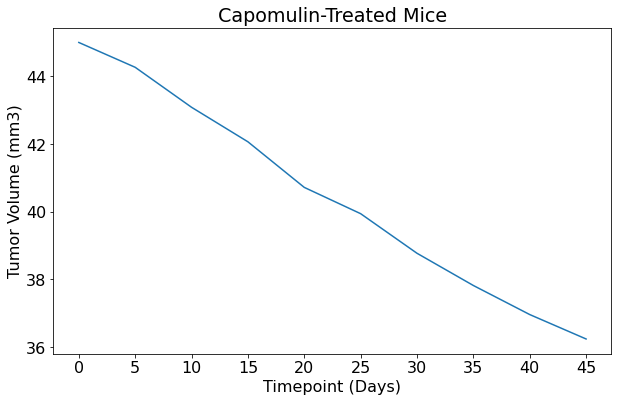

In [29]:
tp_grouped_capo=capomulin_mice.groupby(["Timepoint"])

x_axis_data=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']
tumor_volume=tp_grouped_capo['Tumor Volume (mm3)'].mean()

#x_axis_data.value_counts()
#tumor_volume

                                                        
plt.figure(1, figsize=(10,6))
plt.title('Capomulin-Treated Mice')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.plot(x_axis_data, tumor_volume)

plt.show()

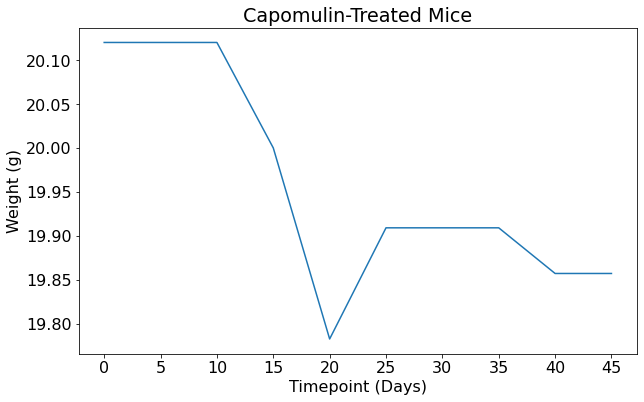

In [32]:
x_axis_data=['0', '5', '10', '15', '20', '25', '30', '35', '40', '45']
weight=tp_grouped_capo['Weight (g)'].mean()

#x_axis_data.value_counts()
#tumor_volume

                                                        
plt.figure(1, figsize=(10,6))
plt.title('Capomulin-Treated Mice')
plt.ylabel('Weight (g)')
plt.xlabel('Timepoint (Days)')
plt.plot(x_axis_data, weight)

plt.show()